In [3]:
import numpy as np
import matplotlib.pyplot as plt

# устанавливаем, чтобы графики рисовались прямо в окне jupyter notebook:
%matplotlib inline  

import sys
sys.path.append("../common/")  # это позволяет делать import файла в параеллельной папке common
from KC_structs import *
from KC_graphics import *
from trajectory_optimization import optimization_Newton 

### Посмотрим на дискретизацию угла направления

In [4]:
theta_16 = Theta()  # фиксируем дискртизацию

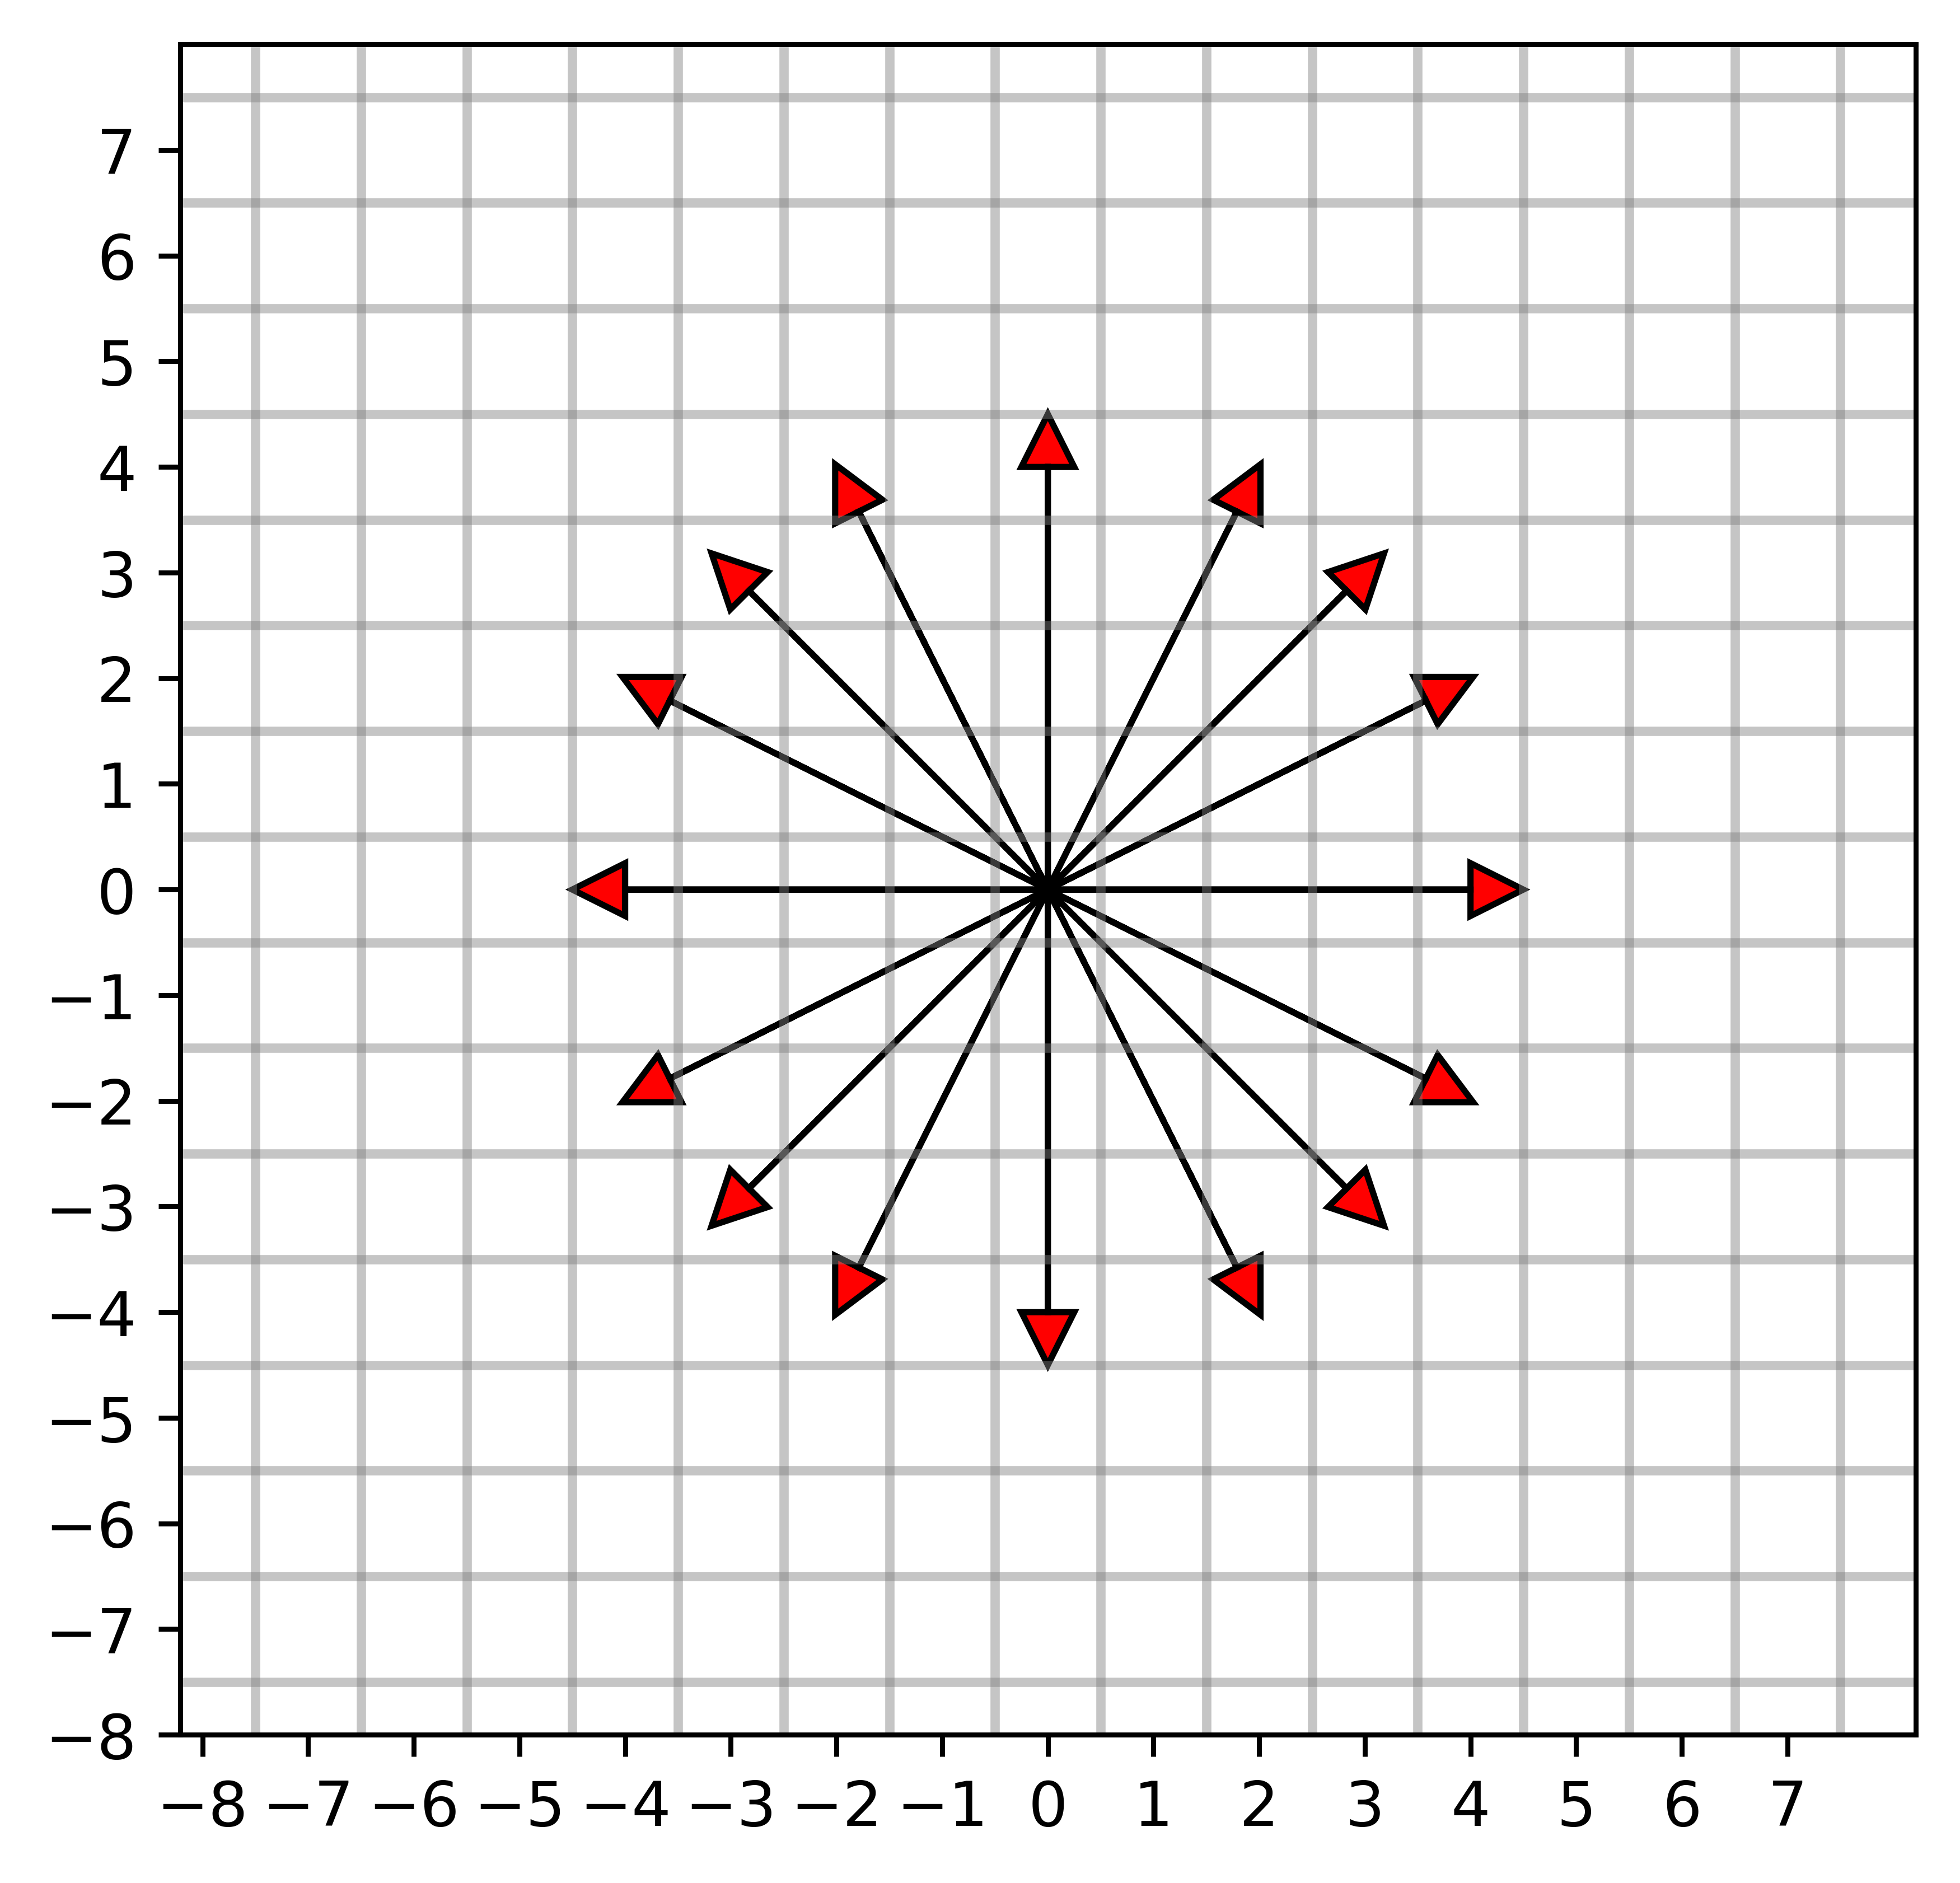

In [5]:
fig = plt.figure(figsize=(5, 5), dpi=800)  # создаём фигуру (это как бы холст, на котором рисуем)
ax = fig.add_subplot(111)  # добавляем оси для рисования КОНКРЕТНОГО графика - 111 означает, что добавляем единственный (то есть
                           # на всем fig будет только один график) график - его положение (1, 1)
for i in range(16):
    plot_arrow(0, 0, theta_16[i], length=4, ax=ax)  # рисуем стрелку для каждого направления
    
draw_grid(ax)  # рисуем сетку

#plt.savefig("theta_diskr.png", transparent=False, facecolor='white')  # можно сохранить картинку при необходимости
plt.show()

### Примеры онлайн-генерации коротких траекторий 
(процесс оптимизации будет рисоваться)

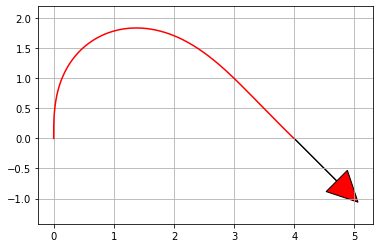

In [6]:
start = State(0, 0, np.pi/2)  # состояние, откуда выходит траектория
target = State(4, 0, -np.pi/4)  # куда должна прийти
traj = optimization_Newton(start, target)

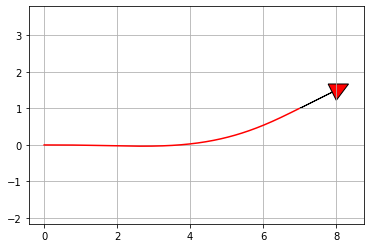

In [7]:
start = State(0,0,0)
target = State(7,1,theta_16[1])
traj = optimization_Newton(start, target)

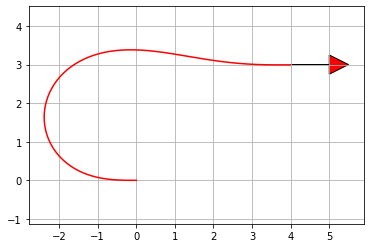

In [8]:
start = State(0, 0, np.pi)
target = State(4, 3, 0)
traj = optimization_Newton(start, target)

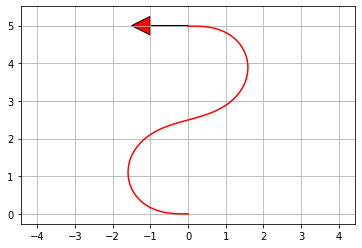

In [9]:
start = State(0, 0, np.pi)
target = State(0, 5, np.pi)
traj = optimization_Newton(start, target)

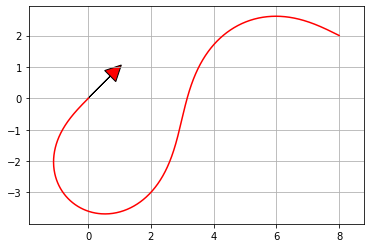

In [10]:
target = State(0, 0, np.deg2rad(2 / 16 * 360))
start = State(x=8.0, y=2.0, theta=np.arctan(2) + 3 * np.pi/2 - np.pi)
traj = optimization_Newton(start, target, show_animation=True)

### Ещё офлайн примеры сгенерированных траекторий

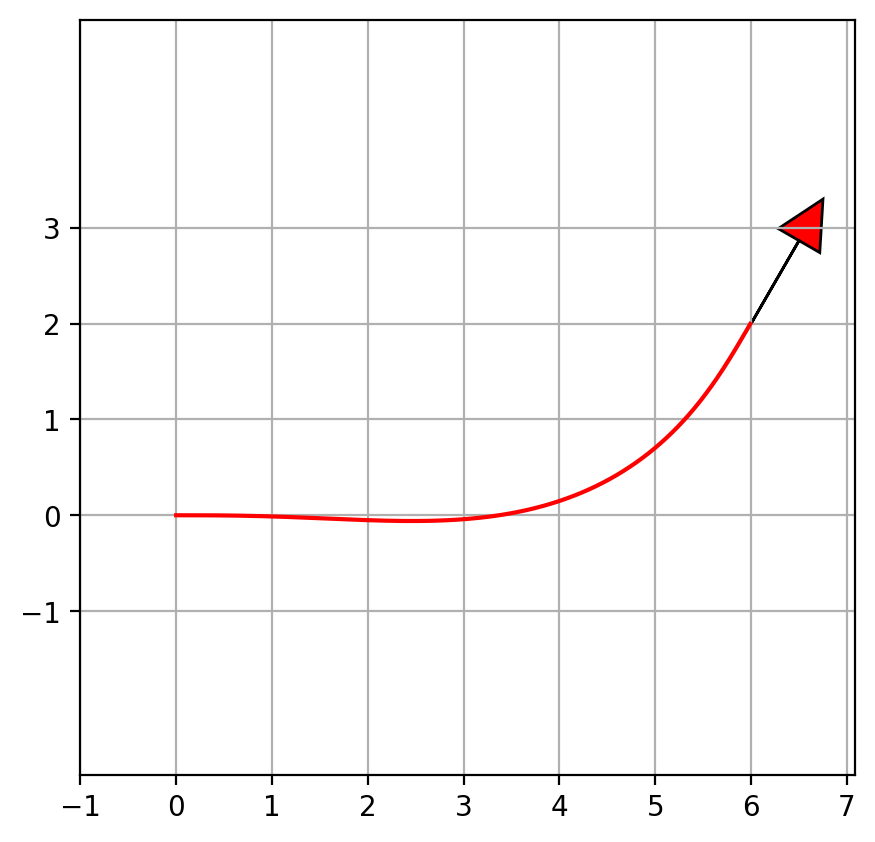

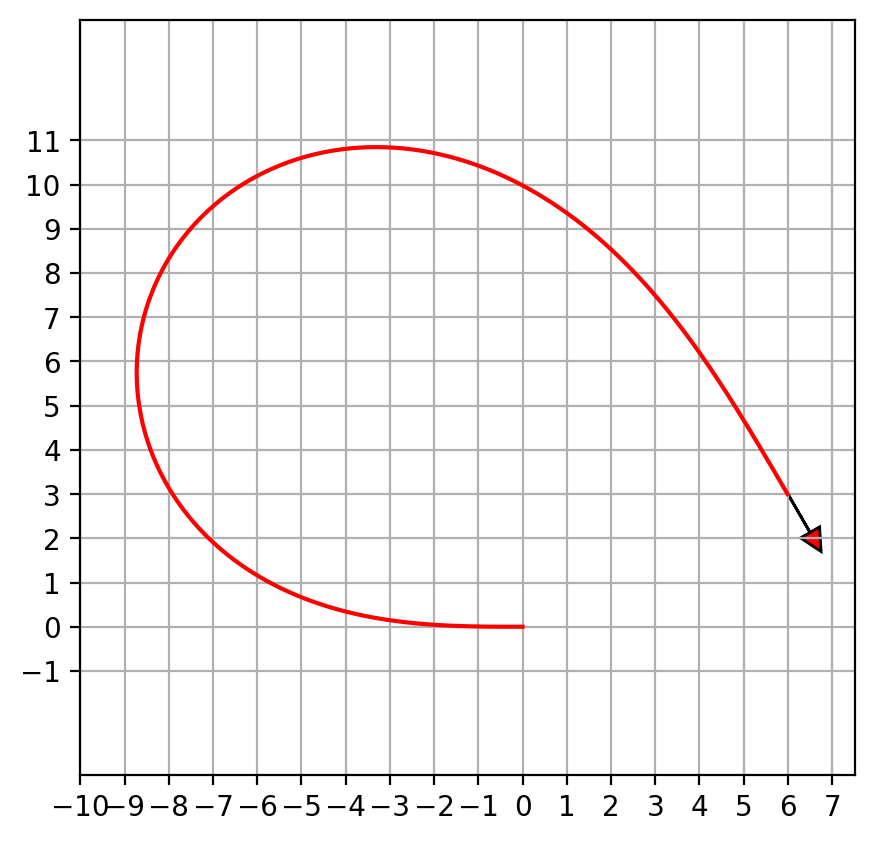

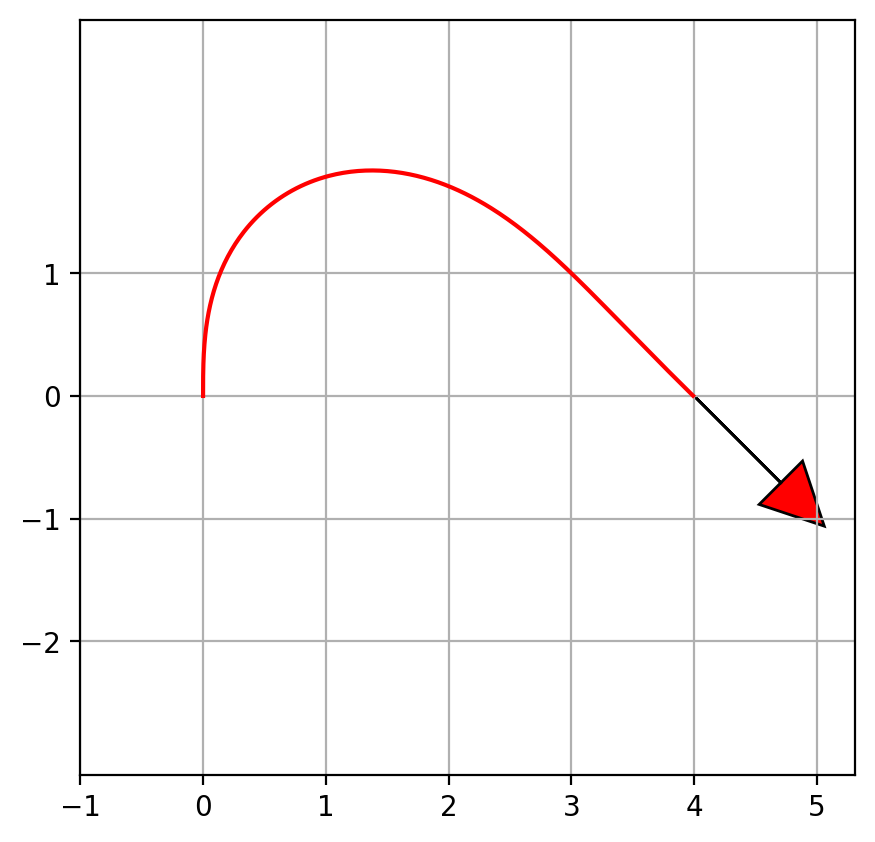

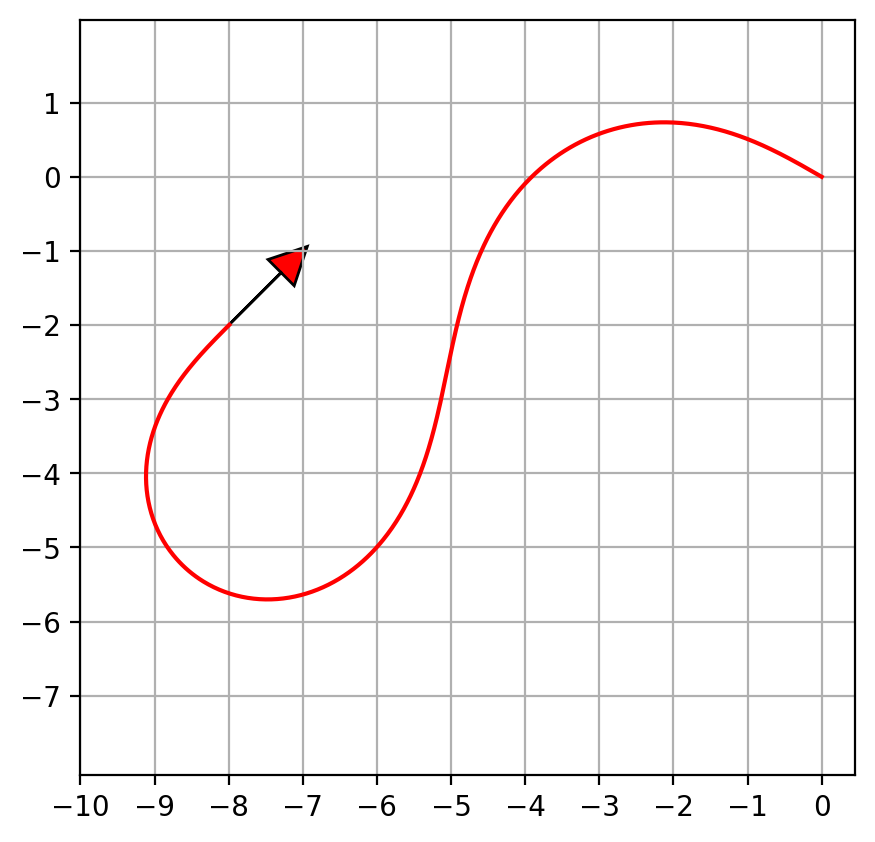

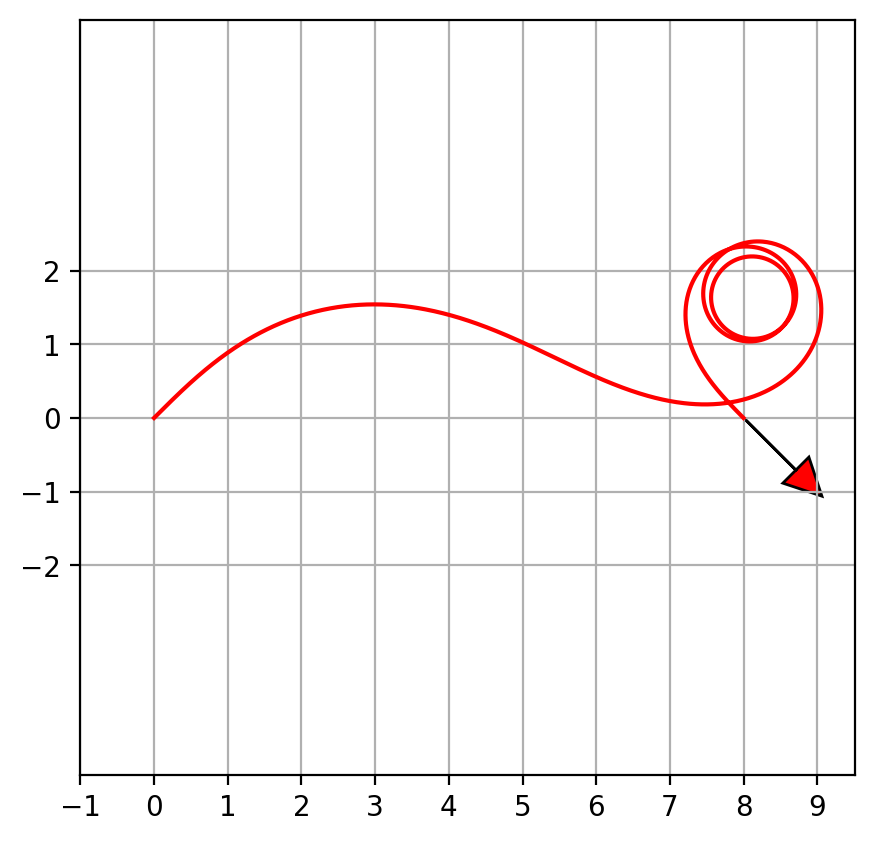

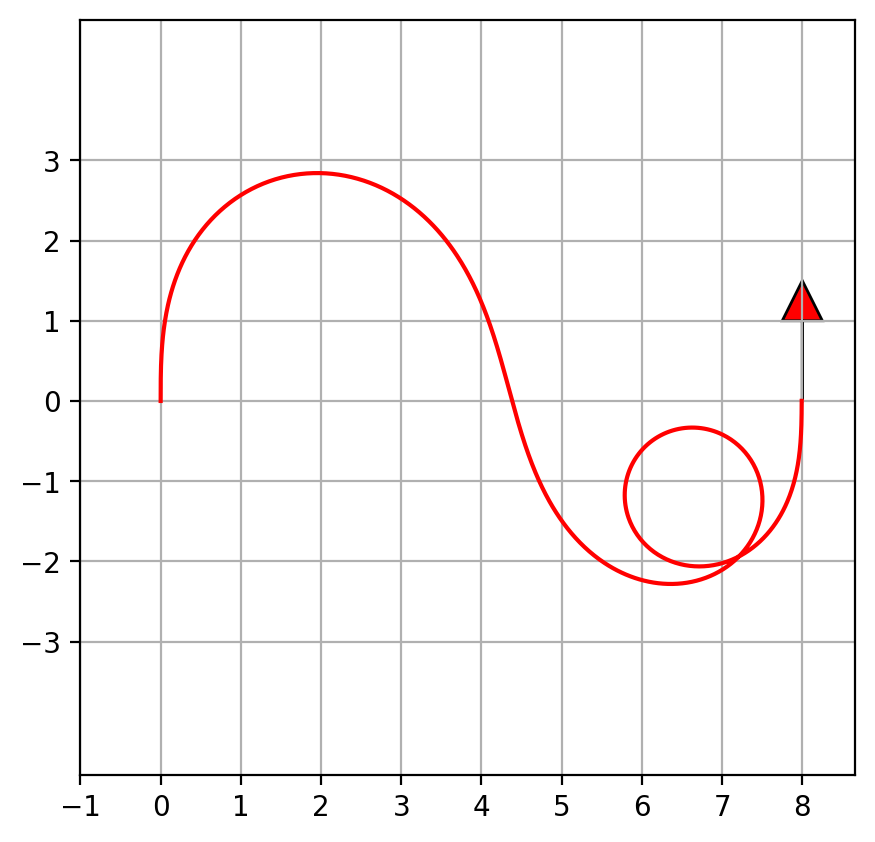

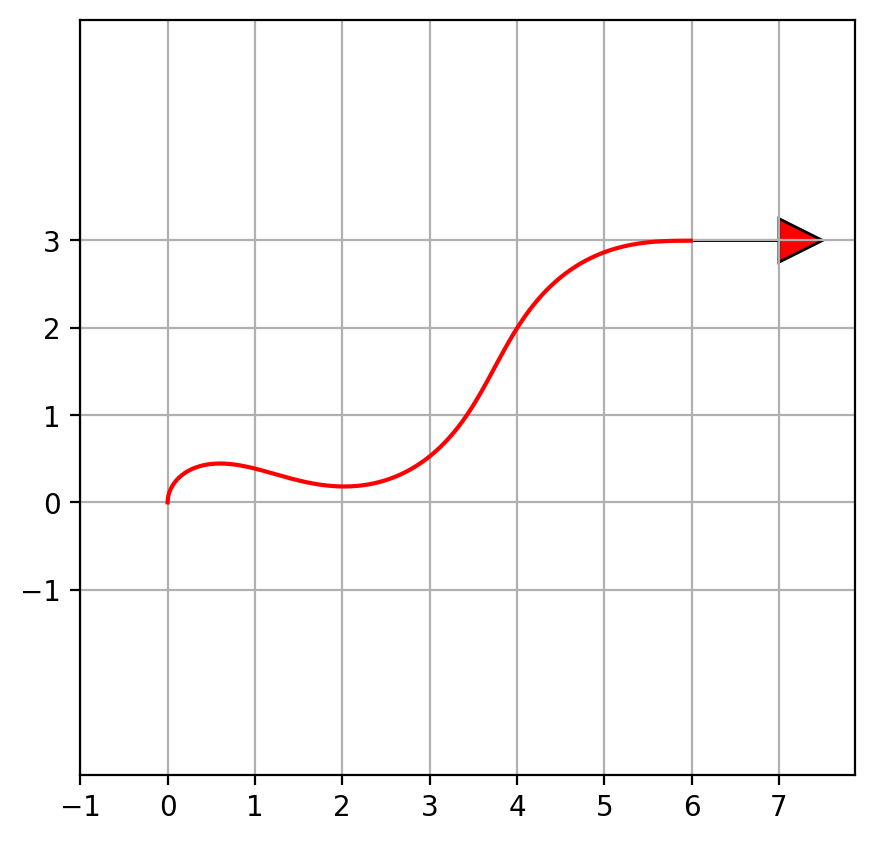

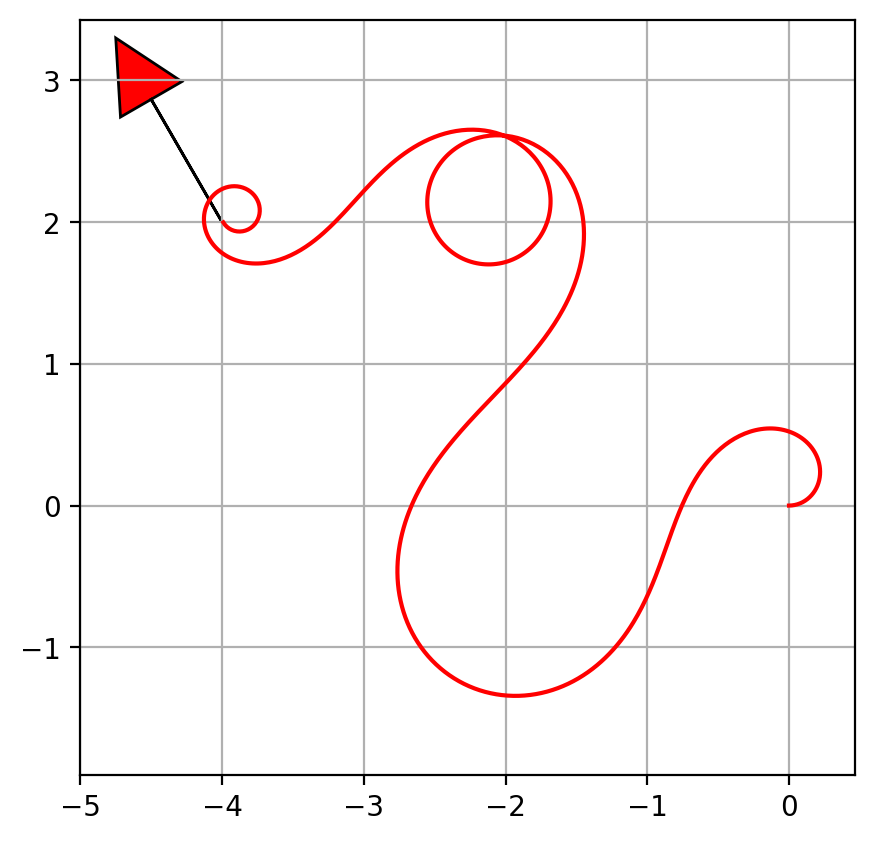

In [11]:
for i, (start, target) in enumerate([(State(0, 0, 0), State(6, 2, np.pi/3)),  # 4 обычных траектории
                                     (State(0, 0, np.pi), State(6, 3, -np.pi/3)),
                                     (State(0, 0, np.pi/2), State(4, 0, -np.pi/4)),
                                     (State(0, 0, 5*np.pi/6), State(-8, -2, np.pi/4)),
                                     
                                     (State(0, 0, np.pi/4), State(8, 0, -np.pi/4 + 6*np.pi)),  # 2 траектории, где углы отличаются больше, чем на 2pi -> необходимо накрутить петли
                                     (State(0, 0, np.pi/2), State(8, 0, 2*np.pi+np.pi/2)),

                                     (State(0, 0, np.pi/2, -3), State(6, 3, 0)),  # траектории, где начальная и конечная кривизна ненулевые
                                     (State(0, 0, 0, 5), State(-4, 2, 2*np.pi/3, -8))
                                    ]):
    
    fig = plt.figure(figsize=(5, 5), dpi=200)
    ax = fig.add_subplot(111)
    plt.axis("equal")
    traj = optimization_Newton(start, target, show_animation=False)  # генерируем траекторию, но не рисуем
    show_trajectory(traj, ax=ax)
    
    xs, xf = plt.gca().get_xlim()  # вычисляем размеры графика по x и по y, которые он занимает
    ys, yf = plt.gca().get_ylim()
    plt.xticks(range(int(xs)-1, int(xf)+1, 1))
    plt.yticks(range(int(ys)-1, int(yf)+1, 1))  # рисуем сетку в этих пределах
    plt.grid(visible=True, which='both')
    
    #plt.savefig("traj_example_" + str(i) + ".png", transparent=False, facecolor='white')
    plt.show()

(-2.0, 6.0)

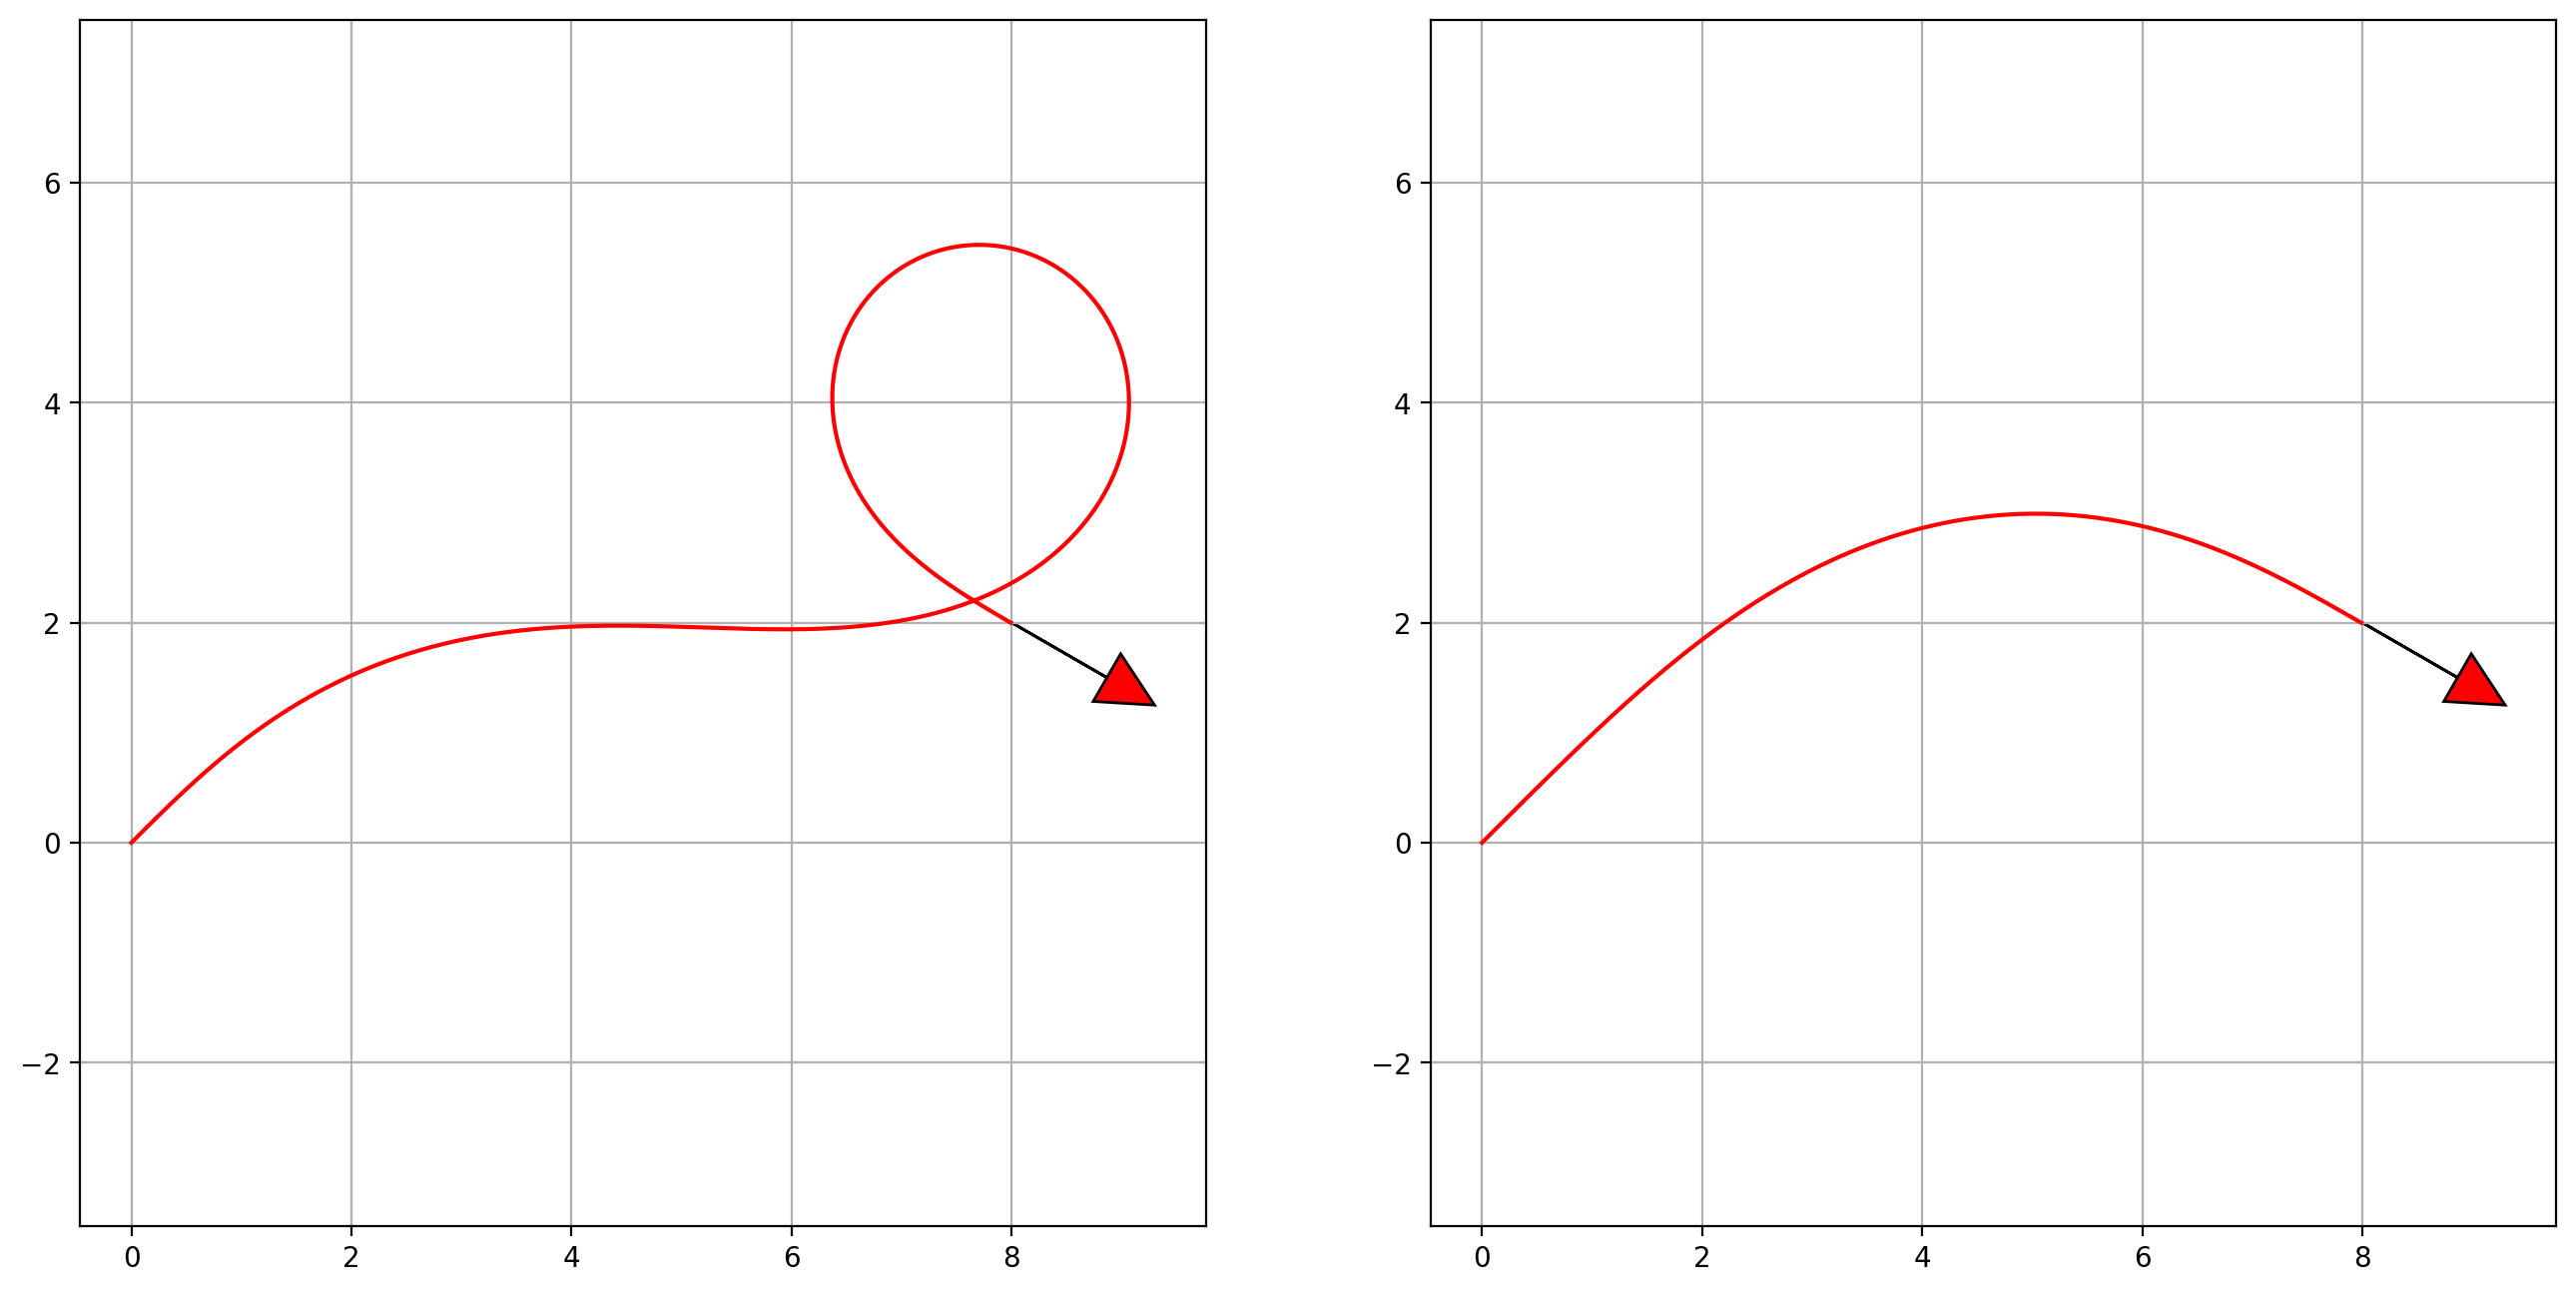

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8), dpi=200, sharex=False, sharey=False)  # создаём матрицу картинок 1 на 2 
axs[0].axis("equal")                                                                 # (то есть 1 строка из 2 картинок)
axs[1].axis("equal")  # на обеих картинках фиксируем, что масштаб по обеим осям одинаковый (картинка не сплющена будет)
axs[0].grid(True)
axs[1].grid(True)  # включаем отрисовку коорднатной сеточки

start = State(0, 0, np.pi/4)
target = State(x=8.0, y=2.0, theta=11 * np.pi/6)
traj = optimization_Newton(start, target, show_animation=False)
show_trajectory(traj, ax=axs[0])

start = State(0, 0, np.pi/4)
target = State(x=8.0, y=2.0, theta=-np.pi/6)
traj = optimization_Newton(start, target, show_animation=False)
show_trajectory(traj, ax=axs[1])

axs[0].set_ylim([-2, 6])  # ставим одинаковые пределы (от и до) по y, в которых будут меняться обе картинки -> 
axs[1].set_ylim([-2, 6])  #               таким образом они на одном уровне будут, что удобно

#plt.savefig("double_ex.png", transparent=False, facecolor='white')

### Отличия между окружностью и сплюснутой окружностью, где в некоторых точках кривизна 0

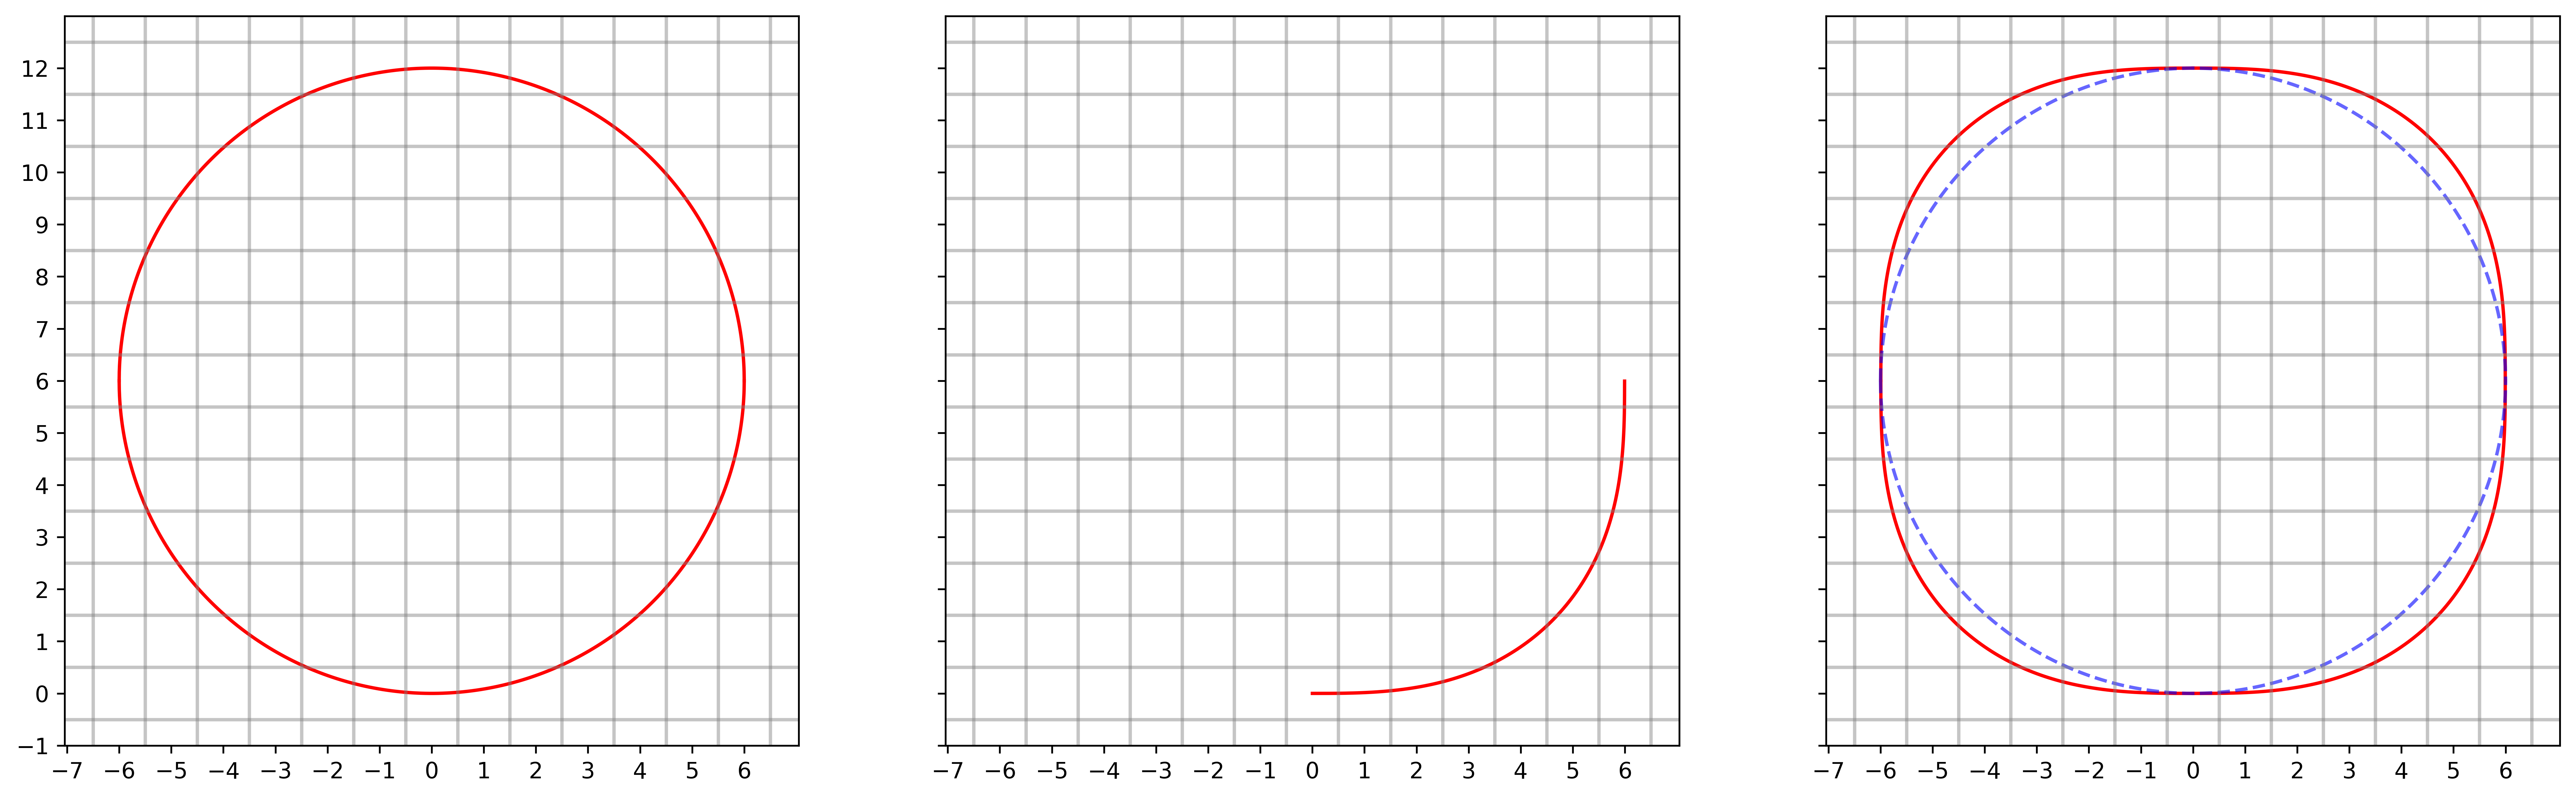

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6), dpi=600, sharex=False, sharey=True)
axs[0].axis("equal")
axs[1].axis("equal")
axs[2].axis("equal")

r = 6  # радиус окружности

# рисуем окружность (из двух кусков - верхняя и нижняя полуокружность):
x = np.linspace(-r, r, 5000)  
y = np.sqrt(r ** 2 - x ** 2)  # уравнение полуокружности y = sqrt(r^2-x^2)
axs[0].plot(x, y+r, color='red')
axs[0].plot(x, -y+r, color='red')  # везе добавляем r, чтобы сдвинуть график на уровень с окржуностью (нижняя точка в 0,0)
xo, yo = x, y

# рисуем четвертинку с начальной и конечной кривизной = 0:
start = State(0, 0, 0)
target = State(r, r, np.pi/2)
traj = optimization_Newton(start, target, show_animation=False)
show_trajectory(traj, ax=axs[1], arrow=False)

# собираем из них сплюснутую окружность (для этого просто отрисовывем 4 раза сдвигая и поворачивая):
x = traj.sample_x()
y = traj.sample_y()
axs[2].plot(x, y, color='red')  # везе добавляем r, чтобы сдвинуть график на уровень с окржуностью (нижняя точка в 0,0)
axs[2].plot(x, -y+2*r, color='red')
axs[2].plot(-x, y, color='red')
axs[2].plot(-x, -y+2*r, color='red')
axs[2].plot(xo, yo+r, color='blue', ls="--", alpha=0.6)
axs[2].plot(xo, -yo+r, color='blue', ls="--", alpha=0.6)

draw_grid(axs[0], xs=-7, xf=7, ys=-1, yf=14-1)  # отрисовываем сеточку (фактически дискретизация рабочего пространства)
draw_grid(axs[1], xs=-7, xf=7, ys=-1, yf=14-1)
draw_grid(axs[2], xs=-7, xf=7, ys=-1, yf=14-1)

#plt.savefig("circ_and_zero.png", transparent=False, facecolor='white')
plt.show()